# Case study on Supervised learning


Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

### 1. Read the dataset to the python environment.


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [194]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [195]:
data.shape

(150, 5)

In [196]:
data.info()
#basic information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [197]:
#check any misssing value present in it
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### 2. Do necessary pre-processing steps.


#Filling Missing values

In [198]:
#show both numerical and categorical data present
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

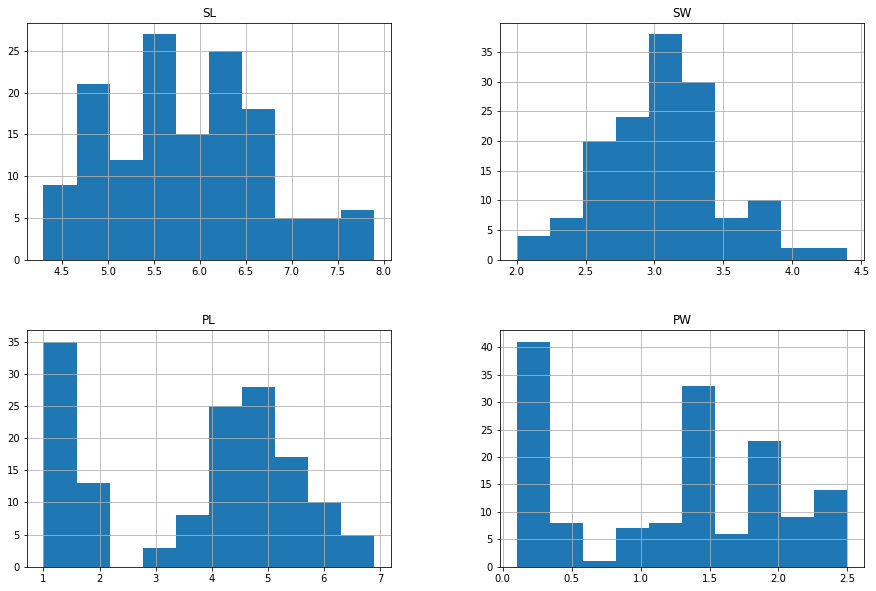

In [199]:
#plot numerical data and check skewnwess
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [200]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [201]:
for i in ['SL', 'SW', 'PL', 'PW']:
    data[i]=data[i].fillna(data[i].median())

In [202]:
data.isna().sum()
#check it

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [203]:
data.Classification.nunique()

3

#Handling Outliers

Text(0.5, 1.0, 'Boxplot of SL')

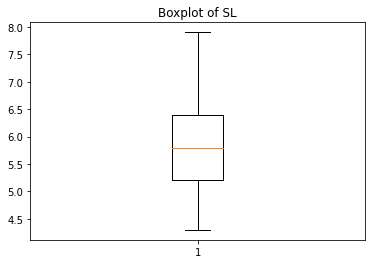

In [204]:
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')

Text(0.5, 1.0, 'Boxplot of SW')

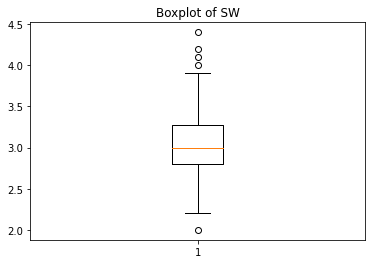

In [205]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')

In [206]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [207]:
IQR=Q3-Q1
print(IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

0.4500000000000002
2.1249999999999996
3.9250000000000003


In [208]:
#loop to remove values below lower limit and values bove upper limit
outlier=[]
for x in data['SW']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [209]:
#next find index of these outliers
ind1=data['SW']<low_limit
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [210]:
data.drop([60],inplace=True)

In [211]:
#next find index of these outliers
ind2=data['SW']>up_limit
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [212]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Boxplot of SW')

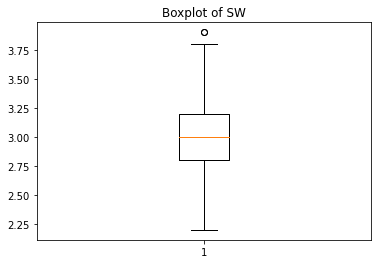

In [213]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')

In [214]:
data.shape

(145, 5)

Text(0.5, 1.0, 'Boxplot of SL')

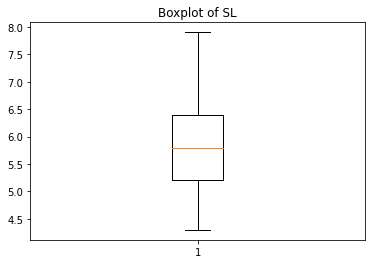

In [215]:
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')

Text(0.5, 1.0, 'Boxplot of SL')

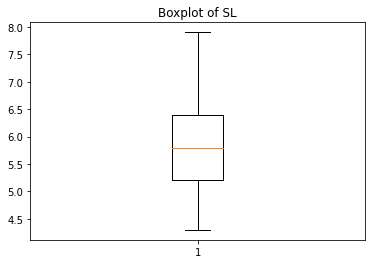

In [216]:
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')

In [217]:
# Encoding
#Classification which is a categorical variable.
#ML algo. cannot handlee categorical  variable unless they are converted to numerical variables.

In [218]:
# One hot encoding

In [219]:
data.Classification.nunique()

3

In [220]:
# 3 different values present in Classification column.
#do encoding using pandas
data=pd.get_dummies(data)
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [221]:
# we can see data encoding is done. 3 new column added.column Classification is automatically drop.
#Now wee have created basic preprocessing steps and we can create a linear regression model. first do correlation

<AxesSubplot:>

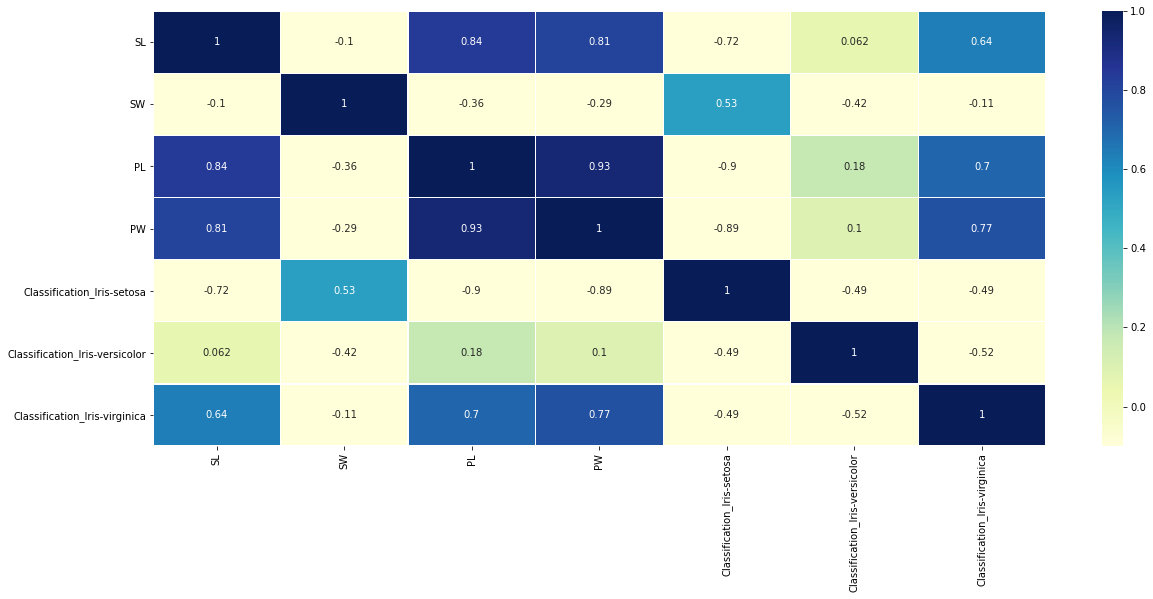

In [222]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.1,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')


From heatmap,  we can see high correlation between Petal Lenght(PL),Petal Width(PW) and Sepal Lenght(SL).

In [223]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [224]:
y=data['PW']
x=data.drop('PW',axis=1)# everything else is take as x

In [225]:
#Next split into testing and training set

In [226]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print("MSE is :", mean_squared_error(y_test,predictions))
print("R squared vaue is :", r2_score(y_test,predictions))

MSE is : 0.03235505925942554
R squared vaue is : 0.9421592448831373


In [227]:
x.describe()

,SL,SW,PL,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,0.317241,0.337931,0.344828
std,0.816827,0.374354,1.712265,0.467015,0.474644,0.476960
min,4.300000,2.200000,1.000000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,0.000000,0.000000,0.000000
75%,6.400000,3.200000,5.100000,1.000000,1.000000,1.000000
max,7.900000,3.900000,6.900000,1.000000,1.000000,1.000000


In [228]:
from sklearn import preprocessing
#instance of standard scaling to a variable
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)

In [229]:
x.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [230]:
x=pd.DataFrame(x)

In [231]:
x.describe()

,0,1,2,3,4,5
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,-7.739977e-16,1.117880e-16,-3.277072e-16,5.313757e-16,-3.522087e-17,-4.073370e-16
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.925769e+00,-2.207277e+00,-1.668817e+00,-6.816498e-01,-7.144345e-01,-7.254763e-01
25%,-8.201252e-01,-5.989595e-01,-1.317189e+00,-6.816498e-01,-7.144345e-01,-7.254763e-01
50%,-8.302920e-02,-6.285378e-02,2.944376e-01,-6.816498e-01,-7.144345e-01,-7.254763e-01
75%,6.540668e-01,4.732520e-01,7.339722e-01,1.467029e+00,1.399708e+00,1.378405e+00
max,2.496807e+00,2.349622e+00,1.788855e+00,1.467029e+00,1.399708e+00,1.378405e+00


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [232]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [233]:
x_train.shape

(116, 6)

In [234]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [235]:
data.dtypes

SL                                float64
SW                                float64
PL                                float64
PW                                float64
Classification_Iris-setosa          uint8
Classification_Iris-versicolor      uint8
Classification_Iris-virginica       uint8
dtype: object

In [236]:
y=data['Classification_Iris-setosa','Classification_Iris-versicolor', 'Classification_Iris-virginica']
x=data.drop(['Classification_Iris-setosa','Classification_Iris-versicolor', 'Classification_Iris-virginica'],axis=1)# everything else is take as x

KeyError: ('Classification_Iris-setosa', 'Classification_Iris-versicolor', 'Classification_Iris-virginica')

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is :",f1_score(y_test,y_pred))

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [238]:
x_train.shape

(116, 6)